*italicized text*## *libraries*

In [1]:

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences


In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Traceback (most recent call last):
  File "C:\Users\shubh\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\shubh\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\shubh\anaconda3\lib\site-packages\pip\__main__.py", line 29, in <module>
    from pip._internal.cli.main import main as _main
  File "C:\Users\shubh\anaconda3\lib\site-packages\pip\_internal\cli\main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "C:\Users\shubh\anaconda3\lib\site-packages\pip\_internal\cli\autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "C:\Users\shubh\anaconda3\lib\site-packages\pip\_internal\cli\main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "C:\Users\shubh\anaconda3\lib\site-packages\pip\_internal\build_env.py", line 16, in <modu

In [2]:
import numpy as np 
import pandas as pd 
import os
import re
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from keras.layers import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [4]:
from keras.utils.generic_utils import CustomObjectScope



## *Reading the dataset*

In [5]:
db1 = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
db2 = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines=True)
final_db =  pd.concat([db1, db2])
final_db.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


## *dataset cleaning*

In [6]:
def data_clean(input):
    input = input.lower()
    
    a = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    input = a.sub('', input)
    input = " ".join(filter(lambda x:x[0]!='@', input.split()))
    emoticon = re.compile("["
                           u"\U0001F600-\U0001FFFF"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF" 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    input = emoticon.sub(r'', input)
    input = input.lower()
    input = re.sub(r"i'm", "i am", input)
    input = re.sub(r"he's", "he is", input)
    input = re.sub(r"she's", "she is", input)
    input = re.sub(r"that's", "that is", input)        
    input = re.sub(r"what's", "what is", input)
    input = re.sub(r"where's", "where is", input) 
    input = re.sub(r"\'ll", " will", input)  
    input = re.sub(r"\'ve", " have", input)  
    input = re.sub(r"\'re", " are", input)
    input = re.sub(r"\'d", " would", input)
    input = re.sub(r"\'ve", " have", input)
    input = re.sub(r"won't", "will not", input)
    input = re.sub(r"don't", "do not", input)
    input = re.sub(r"did't", "did not", input)
    input = re.sub(r"can't", "can not", input)
    input = re.sub(r"it's", "it is", input)
    input = re.sub(r"couldn't", "could not", input)
    input = re.sub(r"have't", "have not", input)
    input = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", input)
    return input

In [10]:
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def tokenize_text(df):
    news_stmt = list()
    stmt = df["headline"].values.tolist()

    for st in stmt:
        st = data_clean(st)
        
        b = word_tokenize(st)
       
        c = str.maketrans('', '', string.punctuation)
        splited = [w.translate(c) for w in b]
        
        characters = [w for w in splited if w.isalpha()]
        sw = set(stopwords.words("english"))
        
        characters = [w for w in characters if not w in sw]
        news_stmt.append(characters)
    return news_stmt

news_stmt = tokenize_text(final_db)
news_stmt[0:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'secret',
  'black',
  'code',
  'minority',
  'shoppers'],
 ['roseanne',
  'revival',
  'catches',
  'thorny',
  'political',
  'mood',
  'better',
  'worse'],
 ['mom',
  'starting',
  'fear',
  'sons',
  'web',
  'series',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'wants',
  'wife',
  'listen',
  'come',
  'alternative',
  'debtreduction',
  'ideas'],
 ['jk', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'magical', 'way'],
 ['advancing', 'worlds', 'women'],
 ['fascinating', 'case', 'eating', 'labgrown', 'meat'],
 ['ceo', 'send', 'kids', 'school', 'work', 'company'],
 ['top', 'snake', 'handler', 'leaves', 'sinking', 'huckabee', 'campaign'],
 ['fridays', 'morning', 'email', 'inside', 'trumps', 'presser', 'ages']]

## *Visualize the most occuring words*

from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
pos_data = final_db.loc[final_db['is_sarcastic'] == 1]
pos_head_lines = tokenize_text(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

## *Train-test split*

In [13]:
splt_val = 0.2
maximum_len = 25


object_tokens = Tokenizer()
object_tokens.fit_on_texts(news_stmt)
seqn = object_tokens.texts_to_sequences(news_stmt)

idx_of_words = object_tokens.word_index
print("the one and only tokens are - ",len(idx_of_words))
size_vocablry = len(object_tokens.word_index) + 1
print('size of vocabulary -', size_vocablry)

padding_of_stmt = pad_sequences(seqn, maxlen=maximum_len, padding='post')
emotion =  final_db['is_sarcastic'].values

indexes = np.arange(padding_of_stmt.shape[0])
np.random.shuffle(indexes)
padding_of_stmt = padding_of_stmt[indexes]
emotion = emotion[indexes]

val_sampl_numb = int(splt_val * padding_of_stmt.shape[0])

x_train_padding = padding_of_stmt[:-val_sampl_numb]
y_train = emotion[:-val_sampl_numb]
x_test_padding = padding_of_stmt[-val_sampl_numb:]
y_test = emotion[-val_sampl_numb:]

the one and only tokens are -  28657
size of vocabulary - 28658


In [14]:
print(' x_train_padding_shape:', x_train_padding.shape)
print(' y_train_shape:', y_train.shape)

print(' x_test_padding_shape:', x_test_padding.shape)
print(' y_test_shape:', y_test.shape)

 x_train_padding_shape: (44263, 25)
 y_train_shape: (44263,)
 x_test_padding_shape: (11065, 25)
 y_test_shape: (11065,)


## *GloVe model Loading *

In [15]:
indx_of_emb = {}
dimension_of_emb = 100
f = open(os.path.join('glove.twitter.27B.100d.txt'), encoding = "utf-8")
for st in f:
    values = st.split()
    w = values[0]
    coefficients = np.asarray(values[1:], dtype='float32')
    indx_of_emb[w] = coefficients
f.close()

print('Found %s word vectors.' % len(indx_of_emb))

FileNotFoundError: ignored

## *now, lets construct the embedding layer*

In [ ]:
matrx_of_emb = np.zeros((len(idx_of_words) + 1, dimension_of_emb))
c = 0
for w, i in idx_of_words.items():
    vect_of_emb = indx_of_emb.get(w)
    if vect_of_emb is not None:
        c+=1
        matrx_of_emb[i] = vect_of_emb
print(c)

24755


In [ ]:
layer_of_emb = Embedding(len(idx_of_words) + 1,
                            dimension_of_emb,
                            weights=[matrx_of_emb],
                            input_length=maximum_len,
                            trainable=False)

## *RNN model building*

In [ ]:
model = Sequential()
model.add(layer_of_emb)
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 100)           2865800   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2,908,105
Trainable params: 42,305
Non-trainable params: 2,865,800
_________________________________________________________________
None


## *Training*

In [ ]:
history = model.fit(x_train_padding, y_train, batch_size=32, epochs=25, validation_data=(x_test_padding, y_test), verbose=2)

Epoch 1/25
1384/1384 - 31s - loss: 0.5101 - acc: 0.7487 - val_loss: 0.4253 - val_acc: 0.8110 - 31s/epoch - 22ms/step
Epoch 2/25
1384/1384 - 27s - loss: 0.4310 - acc: 0.8001 - val_loss: 0.3864 - val_acc: 0.8259 - 27s/epoch - 20ms/step
Epoch 3/25
1384/1384 - 28s - loss: 0.3929 - acc: 0.8223 - val_loss: 0.3536 - val_acc: 0.8434 - 28s/epoch - 20ms/step
Epoch 4/25
1384/1384 - 27s - loss: 0.3618 - acc: 0.8385 - val_loss: 0.3601 - val_acc: 0.8372 - 27s/epoch - 20ms/step
Epoch 5/25
1384/1384 - 27s - loss: 0.3379 - acc: 0.8510 - val_loss: 0.3352 - val_acc: 0.8503 - 27s/epoch - 20ms/step
Epoch 6/25
1384/1384 - 28s - loss: 0.3201 - acc: 0.8614 - val_loss: 0.3497 - val_acc: 0.8472 - 28s/epoch - 20ms/step
Epoch 7/25
1384/1384 - 28s - loss: 0.3044 - acc: 0.8690 - val_loss: 0.3104 - val_acc: 0.8675 - 28s/epoch - 20ms/step
Epoch 8/25
1384/1384 - 28s - loss: 0.2876 - acc: 0.8759 - val_loss: 0.2932 - val_acc: 0.8813 - 28s/epoch - 20ms/step
Epoch 9/25
1384/1384 - 27s - loss: 0.2738 - acc: 0.8848 - val_lo

## *plotting results*

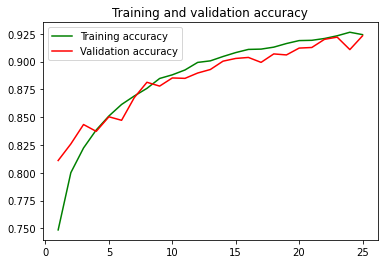

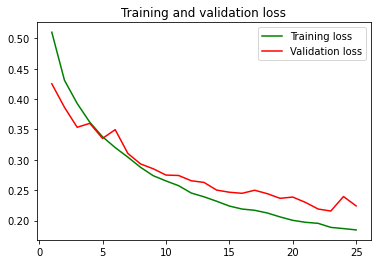

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='acuracy of training')
plt.plot(epochs, val_acc, 'r', label='accuracy of validation')
plt.title('accuracy of Training and validation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='loss of training')
plt.plot(epochs, val_loss, 'r', label='loss of val')
plt.title('loss of Training and validation ')
plt.legend()

plt.show()

<hr>
<h2><i>checking if it can predict sarcasm in sentence?</i></h2>

In [ ]:
def detect_sarcasm(s,model):
    final_x = pd.DataFrame({"headline":[s]})
    lines_for_testing = tokenize_text(final_x)
    seq_test = object_tokens.texts_to_sequences(lines_for_testing)
    padding_test_rev = pad_sequences(seq_test, maxlen=maximum_len, padding='post')
    pred = model.predict(padding_test_rev)
    pred*=100
    if pred[0][0]>=50: return "It's a sarcasm!" 
    else: return "It's not a sarcasm."

### *right prediction*

In [ ]:
detect_sarcasm("I was depressed. He asked me to be happy. I am not depressed anymore.",model)

1/1 [==============================] - 0s 327ms/step


"It's a sarcasm!"

In [ ]:
detect_sarcasm("You just broke my car window. Great job.",model)

1/1 [==============================] - 0s 16ms/step


"It's a sarcasm!"

In [ ]:
detect_sarcasm("You just saved my dog's life. Thanks a million.",model)

TypeError: predict_sarcasm() missing 1 required positional argument: 'model'

In [ ]:
detect_sarcasm("I want a million dollars!",model)

1/1 [==============================] - 0s 15ms/step


"It's not a sarcasm."

In [ ]:
detect_sarcasm("I just won a million dollars!",model)

1/1 [==============================] - 0s 18ms/step


"It's a sarcasm!"

### *wrong prediction*

In [ ]:
detect_sarcasm("His name is Bob. He is a nice person.")

In [ ]:
detect_sarcasm("Sarcasm is very easy to detect.")

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open("model.pkl", "wb"))

saving the final model

In [ ]:
from keras.models import load_model
model.save('model.h5')
model_final = load_model('model.h5')

In [ ]:
def chatbot_response(msg):
    ints = detect_sarcasm(msg,model_final)
   
    return ints

In [ ]:
import tkinter
from tkinter import *

In [ ]:
def send():
    message = EntryBox.get("1.0", "end-1c").strip()
    EntryBox.delete("0.0", END)
    
    if message != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "Statement: " + message + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))
        
        res = chatbot_response(message)
        ChatLog.insert(END, "Prediction: " + res + '\n\n')
        
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)

        
base = Tk()
base.title("Sarcasm Detection")
base.geometry("400x500")
base.resizable(width=FALSE, height=FALSE)

#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#32de97", activebackground="#3c9d9b",fg='#ffffff',
                    command= send )
#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")

scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)

base.mainloop()


1/1 [==============================] - 0s 16ms/step
